In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science B.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 639 ms, sys: 241 ms, total: 881 ms
Wall time: 1.07 s


Timestamp                    Email Address  \
0    5/3/2023 21:33:09    bagusdwimahendra383@gmail.com   
1    6/19/2023 9:53:14   nikomangsulastriasih@gmail.com   
2    5/3/2023 21:33:28            idewaayu306@gmail.com   
3    5/3/2023 20:21:09          igedebandem14@gmail.com   
4   6/19/2023 10:01:10   nikomangsulastriasih@gmail.com   
5    5/5/2023 14:53:49       ni4838@guru.smp.belajar.id   
6    6/19/2023 9:49:38   nikomangsulastriasih@gmail.com   
7    6/19/2023 9:56:10   nikomangsulastriasih@gmail.com   
8    5/3/2023 23:03:41           kadekradit02@gmail.com   
9    5/3/2023 19:17:20      ikadeksatriaputra@gmail.com   
10   5/4/2023 18:23:05          ikomangadi276@gmail.com   
11   5/4/2023 18:28:21          ikomangadi276@gmail.com   
12   5/4/2023 18:10:33              wanngela7@gmail.com   
13   5/4/2023 17:54:51           riokomang433@gmail.com   
14   5/4/2023 17:57:37           riokomang433@gmail.com   
15   5/4/2023 17:59:28             sayakelaz1@gmail.com   
16   6/19/2023 9:41:24   nikomangsulastriasih@gmail.com   
17   5/3/2023 19:07:40               aryaax1d@gmail.com   
18   5/3/2023 20:05:59               hp995911@gmail.com   
19   6/19/2023 9:58:32   nikomangsulastriasih@gmail.com   
20   5/4/2023 18:02:17     komanggatrawan2017@gmail.com   
21   5/3/2023 21:59:22           werdhiidaayu@gmail.com   
22   5/3/2023 21:36:52         teguhtriguna08@gmail.com   
23   5/4/2023 21:54:34         rahayungardi27@gmail.com   
24   5/3/2023 19:23:07         ardinatamanik4@gmail.com   
25   5/5/2023 22:50:38            yulitafanya@gmail.com   
26   5/4/2023 18:05:20   natasyaputri05062010@gmail.com   
27   5/5/2023 19:42:44          putunovariana@gmail.com   
28   5/4/2023 17:49:05        ayudianiputri11@gmail.com   
29   5/4/2023 17:48:48            erayanti983@gmail.com   
30   5/3/2023 19:17:57  nikomangjuliantari090@gmail.com   
31   5/4/2023 18:04:28              s16598206@gmail.com   
32   6/19/2023 9:46:04   nikomangsulastriasih@gmail.com   
33   5/3/2023 20:14:03         soniamirandini@gmail.com   
34   5/3/2023 20:48:20      putufridasukarini@gmail.com   
35   5/3/2023 21:58:29         selaparamitha5@gmail.com   
36   5/10/2023 8:49:24        vafamily.arya06@gmail.com   

                          NAMA LENGKAP  NO ABSEN KELAS  \
0                   Bagus Dwi Mahendra         1  VIIB   
1   Desak Ketut Galuh Maya Sintya Dewi         2  VIIB   
2           Dewa Ayu Intan Aulya Putri         3  VIIB   
3                I Gede Mahendra Putra         4  VIIB   
4                I Gede Mahendra Putra         5  VIIB   
5            I Gusti Ayu Ardiani Putri         6  VIIB   
6         I Gusti Ayu Ocha Kinara Dewi         7  VIIB   
7                 I Kadek Dwi Mahendra         8  VIIB   
8              I Kadek Raditya Pramana         9  VIIB   
9                 I Kadek Satria Putra        10  VIIB   
10              I Komang Adi Suadnyana        11  VIIB   
11              I Komang Adi Suadnyana        11  VIIB   
12              I Komang Reva Andrawan        12  VIIB   
13          I Komang Rio Sanjaya Putra        13  VIIB   
14          I Komang Rio Sanjaya Putra        13  VIIB   
15                    I Made Danu Wija        14  VIIB   
16            I Made Yuda Dwi Diatmika        15  VIIB   
17             I Nyoman Arya Rai Karna        16  VIIB   
18          I Putu Hendra Putra Antara        17  VIIB   
19          I Wayan Javas Artha Wiguna        18  VIIB   
20          I Wayan Jaya Indra Saputra        19  VIIB   
21     Ida Ayu Putu Werdhi Pradnyawati        20  VIIB   
22           Komang Agus Teguh Triguna        21  VIIB   
23   Luh Ade Dwi Hartati Rahayu Ngardi        22  VIIB   
24         Made Ardinata Manik Udayasa        23  VIIB   
25       Maria Preiscelia Meisya Gawar        24  VIIB   
26                Natasya Putri Ependi        25  VIIB   
27                Ni Kadek Dwi Pertami        26  VIIB   
28           Ni Komang Ayu Diani Putri        27  VIIB   
29            Ni Komang Fitri 

In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                   Email Address  \
0   5/3/2023 21:33:09   bagusdwimahendra383@gmail.com   
1   6/19/2023 9:53:14  nikomangsulastriasih@gmail.com   
2   5/3/2023 21:33:28           idewaayu306@gmail.com   
3   5/3/2023 20:21:09         igedebandem14@gmail.com   
4  6/19/2023 10:01:10  nikomangsulastriasih@gmail.com   

                         NAMA LENGKAP  NO ABSEN KELAS  \
0                  Bagus Dwi Mahendra         1  VIIB   
1  Desak Ketut Galuh Maya Sintya Dewi         2  VIIB   
2          Dewa Ayu Intan Aulya Putri         3  VIIB   
3               I Gede Mahendra Putra         4  VIIB   
4               I Gede Mahendra Putra         5  VIIB   

  1. Teman anda yang paling anda sukai di kelas  \
0                    I Putu Hendra Putra Antara   
1                        Ni Putu Sela Paramitha   
2                        Ni Putu Frida Sukarini   
3                       I Nyoman Arya Rai Karna   
4                       I Nyoman Arya Rai Karna   

       

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 2.98 ms, sys: 320 µs, total: 3.3 ms
Wall time: 3.08 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 589 µs, sys: 91 µs, total: 680 µs
Wall time: 698 µs


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data B.csv', index=False)

CPU times: user 5.41 ms, sys: 4.71 ms, total: 10.1 ms
Wall time: 10.5 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 366 µs, sys: 64 µs, total: 430 µs
Wall time: 400 µs


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 376 µs, sys: 33 µs, total: 409 µs
Wall time: 405 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 17.6 ms, sys: 4.24 ms, total: 21.8 ms
Wall time: 18.1 ms


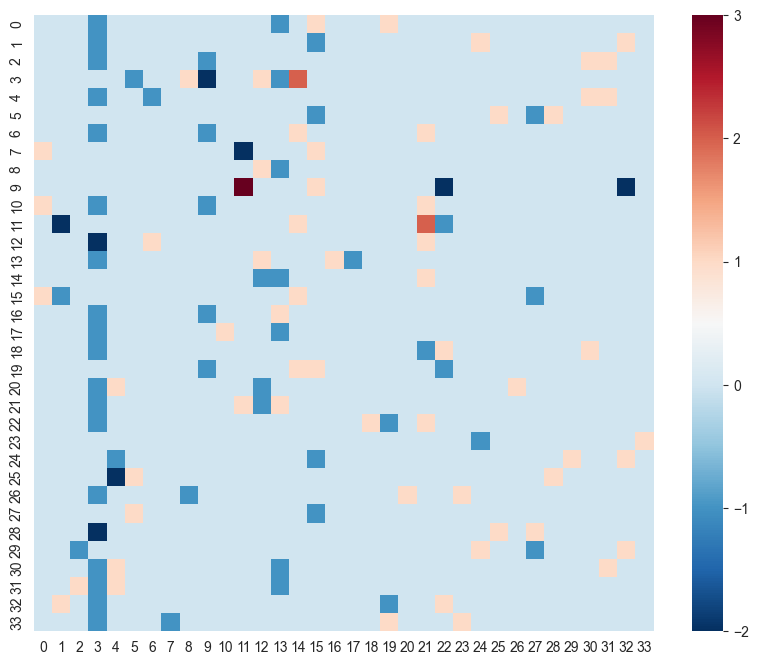

CPU times: user 3.15 s, sys: 204 ms, total: 3.36 s
Wall time: 4.75 s


In [9]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 2.96 ms, sys: 1.1 ms, total: 4.05 ms
Wall time: 3.27 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

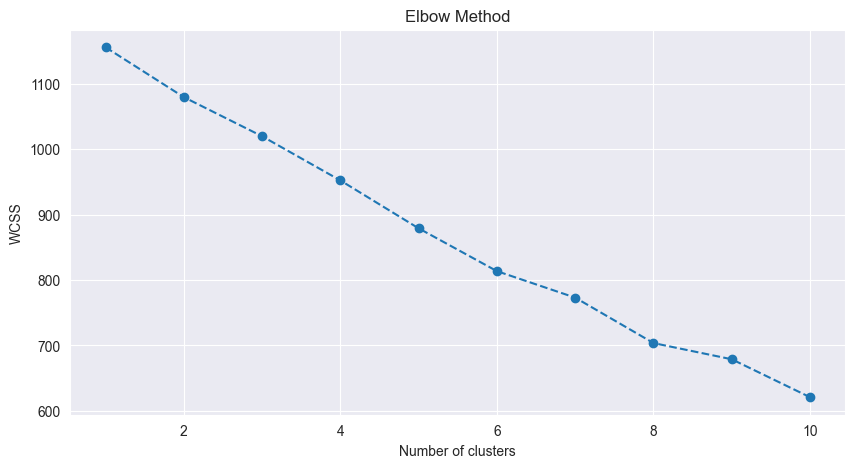

CPU times: user 3.02 s, sys: 354 ms, total: 3.37 s
Wall time: 2.22 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 65.7 ms, sys: 8.19 ms, total: 73.9 ms
Wall time: 30.9 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                   Email Address  \
0   5/3/2023 21:33:09   bagusdwimahendra383@gmail.com   
1   6/19/2023 9:53:14  nikomangsulastriasih@gmail.com   
2   5/3/2023 21:33:28           idewaayu306@gmail.com   
3   5/3/2023 20:21:09         igedebandem14@gmail.com   
4  6/19/2023 10:01:10  nikomangsulastriasih@gmail.com   

                         NAMA LENGKAP  NO ABSEN KELAS  \
0                  Bagus Dwi Mahendra         1  VIIB   
1  Desak Ketut Galuh Maya Sintya Dewi         2  VIIB   
2          Dewa Ayu Intan Aulya Putri         3  VIIB   
3               I Gede Mahendra Putra         4  VIIB   
4               I Gede Mahendra Putra         5  VIIB   

  1. Teman anda yang paling anda sukai di kelas  \
0                    I Putu Hendra Putra Antara   
1                        Ni Putu Sela Paramitha   
2                        Ni Putu Frida Sukarini   
3                       I Nyoman Arya Rai Karna   
4                       I Nyoman Arya Rai Karna   

       

In [14]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



34
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [15]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 255 µs, sys: 45 µs, total: 300 µs
Wall time: 289 µs


In [16]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


            Timestamp                    Email Address  \
0   5/3/2023 21:33:09    bagusdwimahendra383@gmail.com   
1   6/19/2023 9:53:14   nikomangsulastriasih@gmail.com   
2   5/3/2023 21:33:28            idewaayu306@gmail.com   
4   5/5/2023 14:53:49       ni4838@guru.smp.belajar.id   
5   6/19/2023 9:49:38   nikomangsulastriasih@gmail.com   
7   5/3/2023 23:03:41           kadekradit02@gmail.com   
8   5/3/2023 19:17:20      ikadeksatriaputra@gmail.com   
13  6/19/2023 9:41:24   nikomangsulastriasih@gmail.com   
16  6/19/2023 9:58:32   nikomangsulastriasih@gmail.com   
17  5/4/2023 18:02:17     komanggatrawan2017@gmail.com   
18  5/3/2023 21:59:22           werdhiidaayu@gmail.com   
20  5/4/2023 21:54:34         rahayungardi27@gmail.com   
21  5/3/2023 19:23:07         ardinatamanik4@gmail.com   
23  5/4/2023 18:05:20   natasyaputri05062010@gmail.com   
24  5/5/2023 19:42:44          putunovariana@gmail.com   
25  5/4/2023 17:49:05        ayudianiputri11@gmail.com   
26  5/4/2023 1

In [17]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 65 µs, sys: 49 µs, total: 114 µs
Wall time: 121 µs


In [23]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 10.9 ms, sys: 717 µs, total: 11.6 ms
Wall time: 11.3 ms


In [26]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'count')

CPU times: user 8.05 ms, sys: 1.21 ms, total: 9.26 ms
Wall time: 8.42 ms


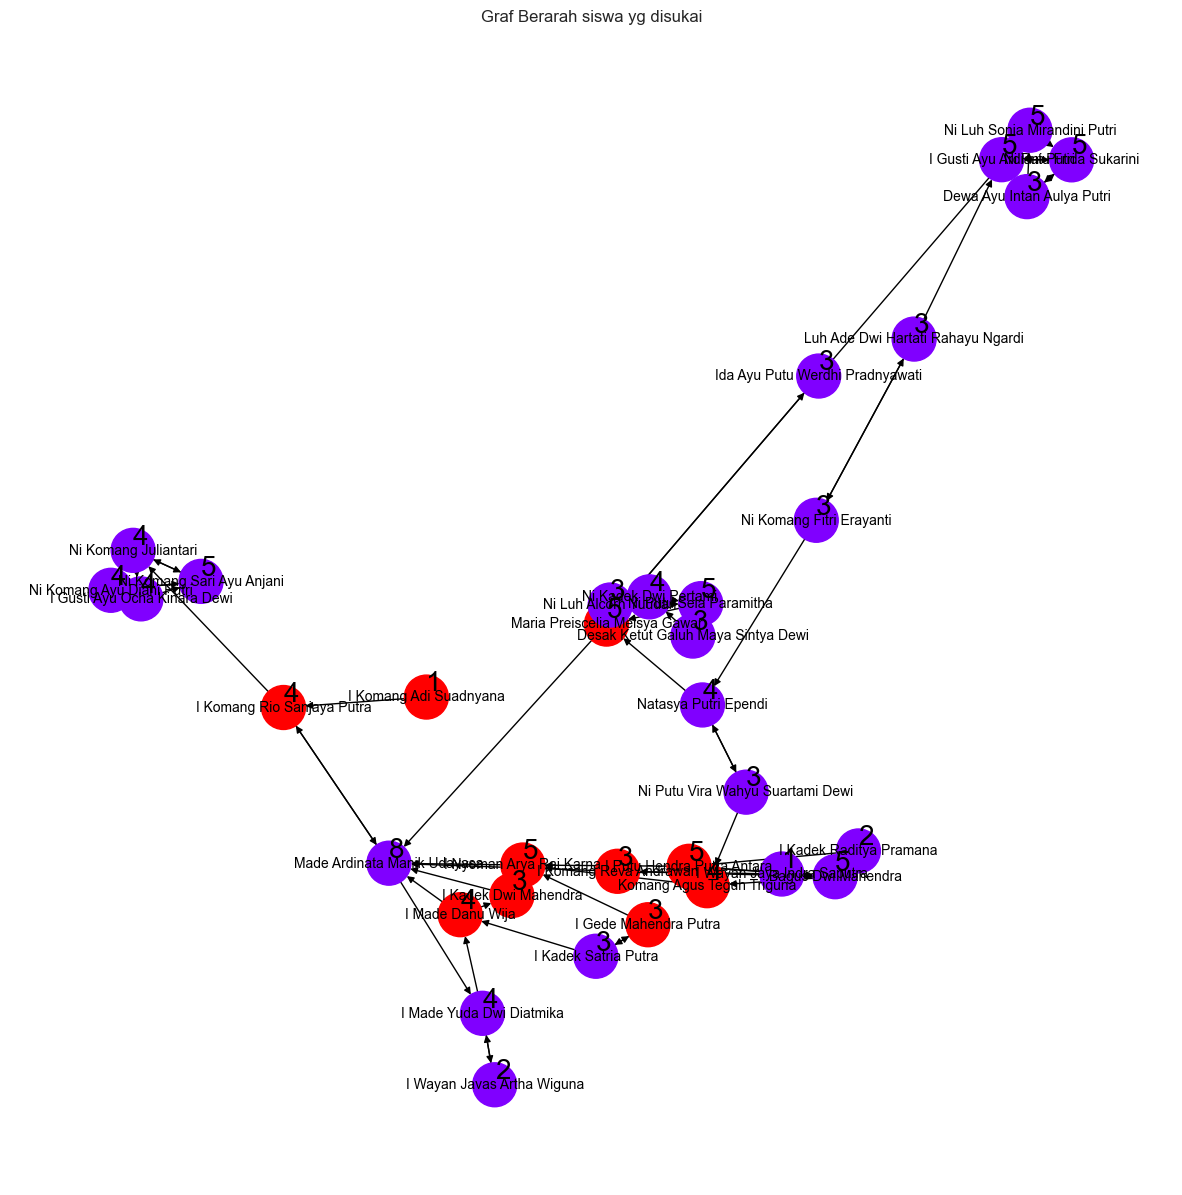

CPU times: user 4.15 s, sys: 941 ms, total: 5.09 s
Wall time: 12.8 s


In [27]:
%%time
# Visualisasi graf berarah

# Jarak antara node
k = 50

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, node_size=1000)
labels = {node: G.nodes[node].get('count', 0) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', verticalalignment='bottom', horizontalalignment="left", font_size=20)

ax.set_title('Graf Berarah siswa yg disukai')
plt.show()

In [ ]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

In [84]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 199 µs, sys: 24 µs, total: 223 µs
Wall time: 229 µs


In [85]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 5.58 ms, sys: 1.08 ms, total: 6.66 ms
Wall time: 7.79 ms


In [86]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
            Timestamp                  Email Address  \
21  5/3/2023 19:23:07       ardinatamanik4@gmail.com   
0   5/3/2023 21:33:09  bagusdwimahendra383@gmail.com   
14  5/3/2023 19:07:40             aryaax1d@gmail.com   
31  5/3/2023 20:48:20    putufridasukarini@gmail.com   
30  5/3/2023 20:14:03       soniamirandini@gmail.com   

                    NAMA LENGKAP  NO ABSEN KELAS  \
21   Made Ardinata Manik Udayasa        23  VIIB   
0             Bagus Dwi Mahendra         1  VIIB   
14       I Nyoman Arya Rai Karna        16  VIIB   
31        Ni Putu Frida Sukarini        33  VIIB   
30  Ni Luh Sonia Mirandini Putri        32  VIIB   

   1. Teman anda yang paling anda sukai di kelas  \
21                    I Komang Rio Sanjaya Putra   
0                     I Putu Hendra Putra Antara   
14                   I Gede Bandem Satria Wijaya   
31                     I Gusti Ayu Ardiani Putri   
30                     I Gusti Ayu Ardiani Putri   



/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


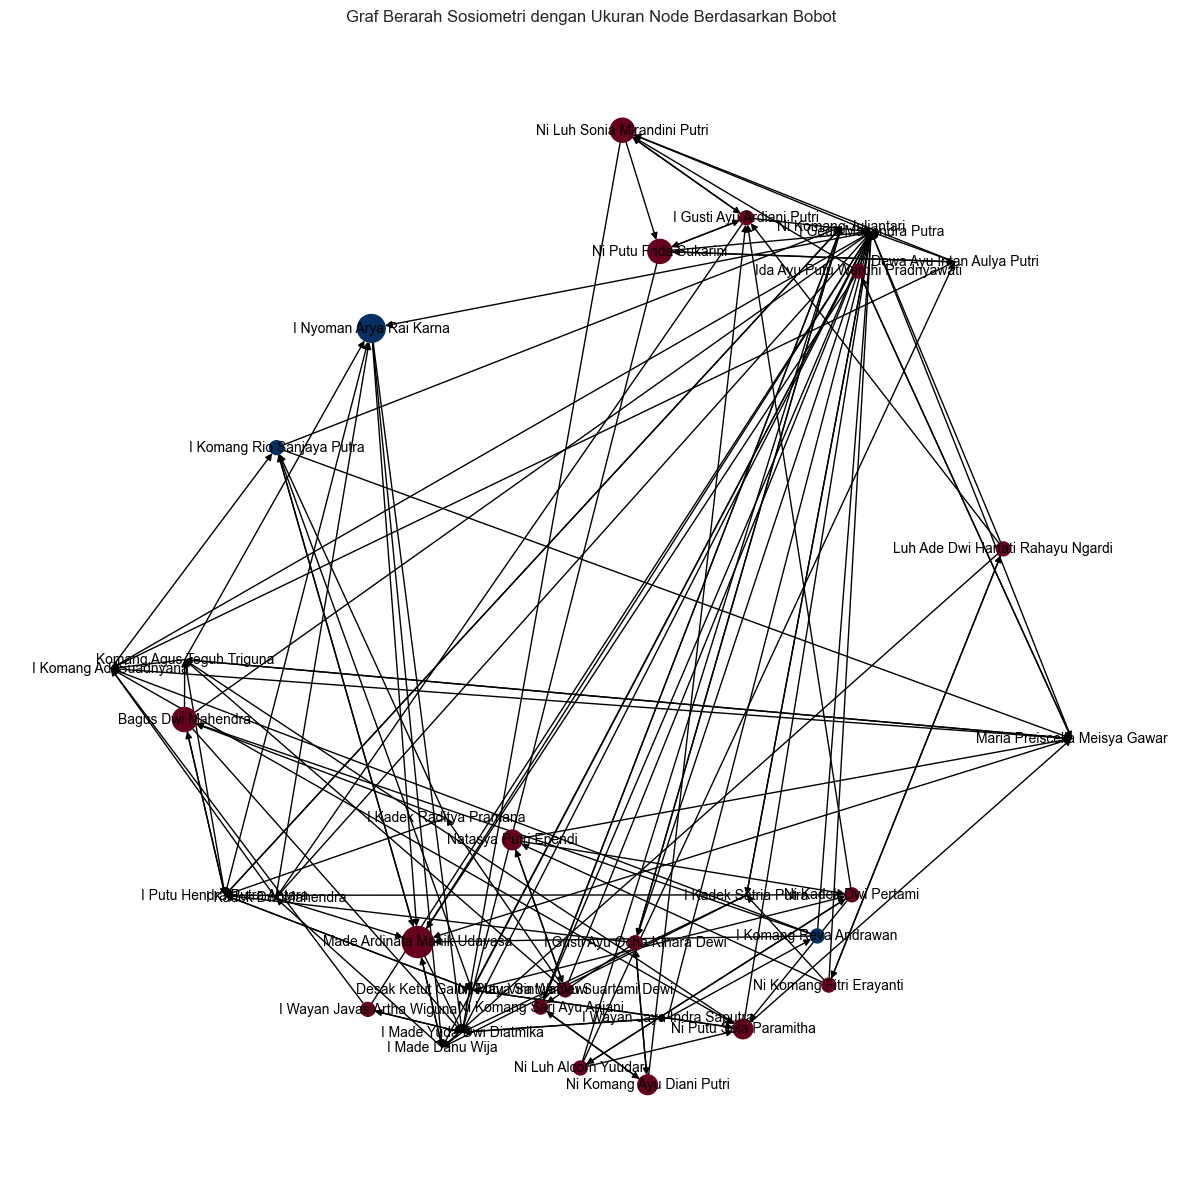

CPU times: user 3.86 s, sys: 215 ms, total: 4.07 s
Wall time: 4.86 s


In [87]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [88]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 16.9 µs


In [89]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 510 µs, sys: 35 µs, total: 545 µs
Wall time: 565 µs


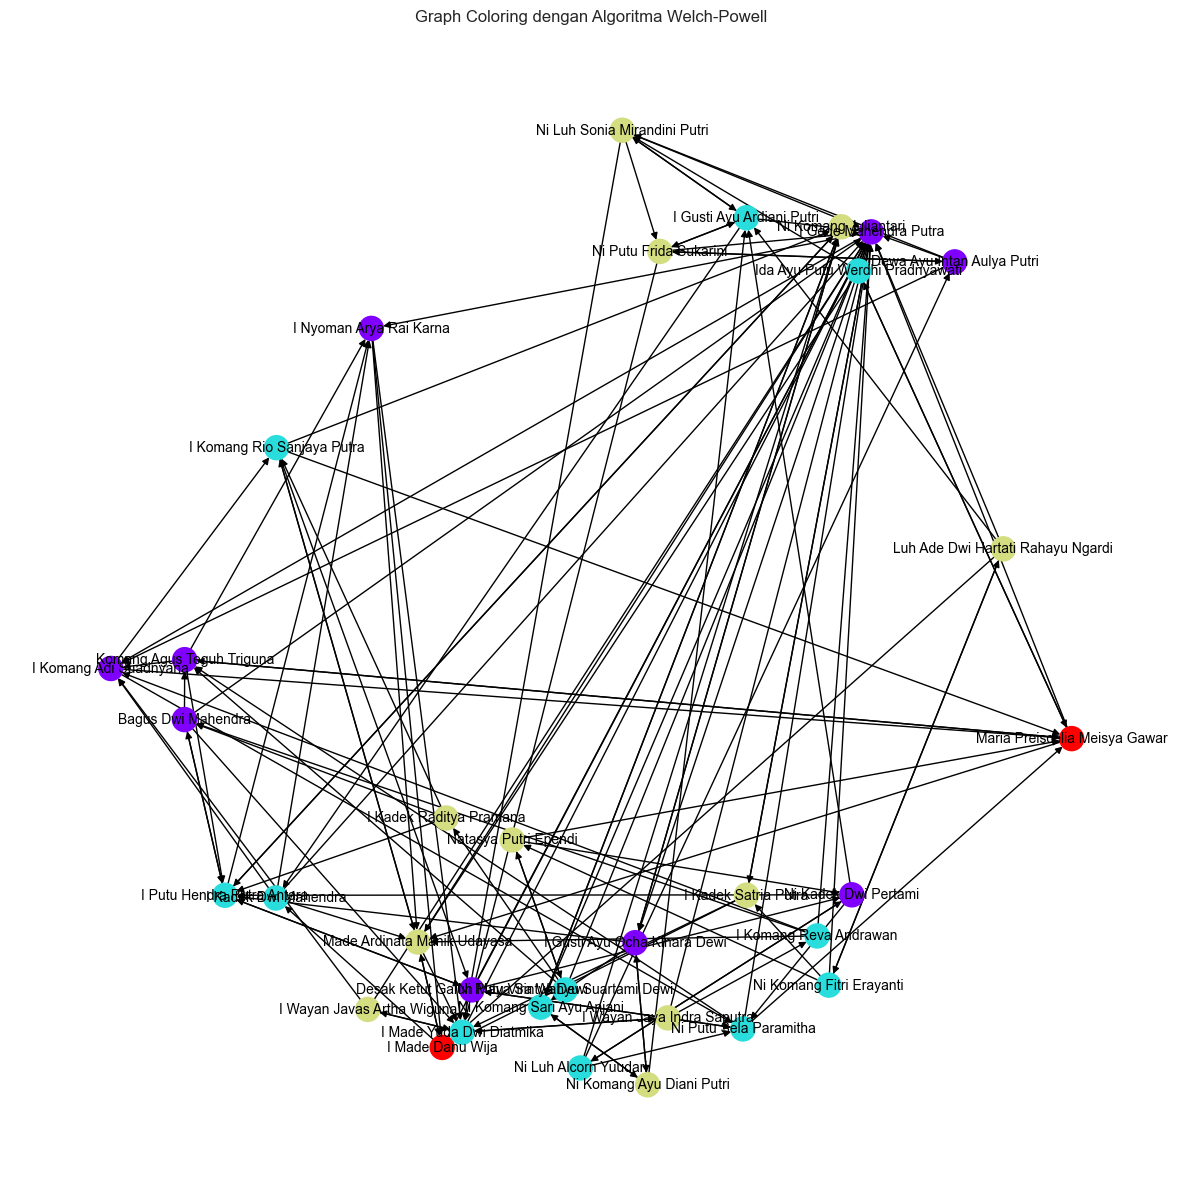

CPU times: user 4.16 s, sys: 236 ms, total: 4.39 s
Wall time: 5.17 s


In [90]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


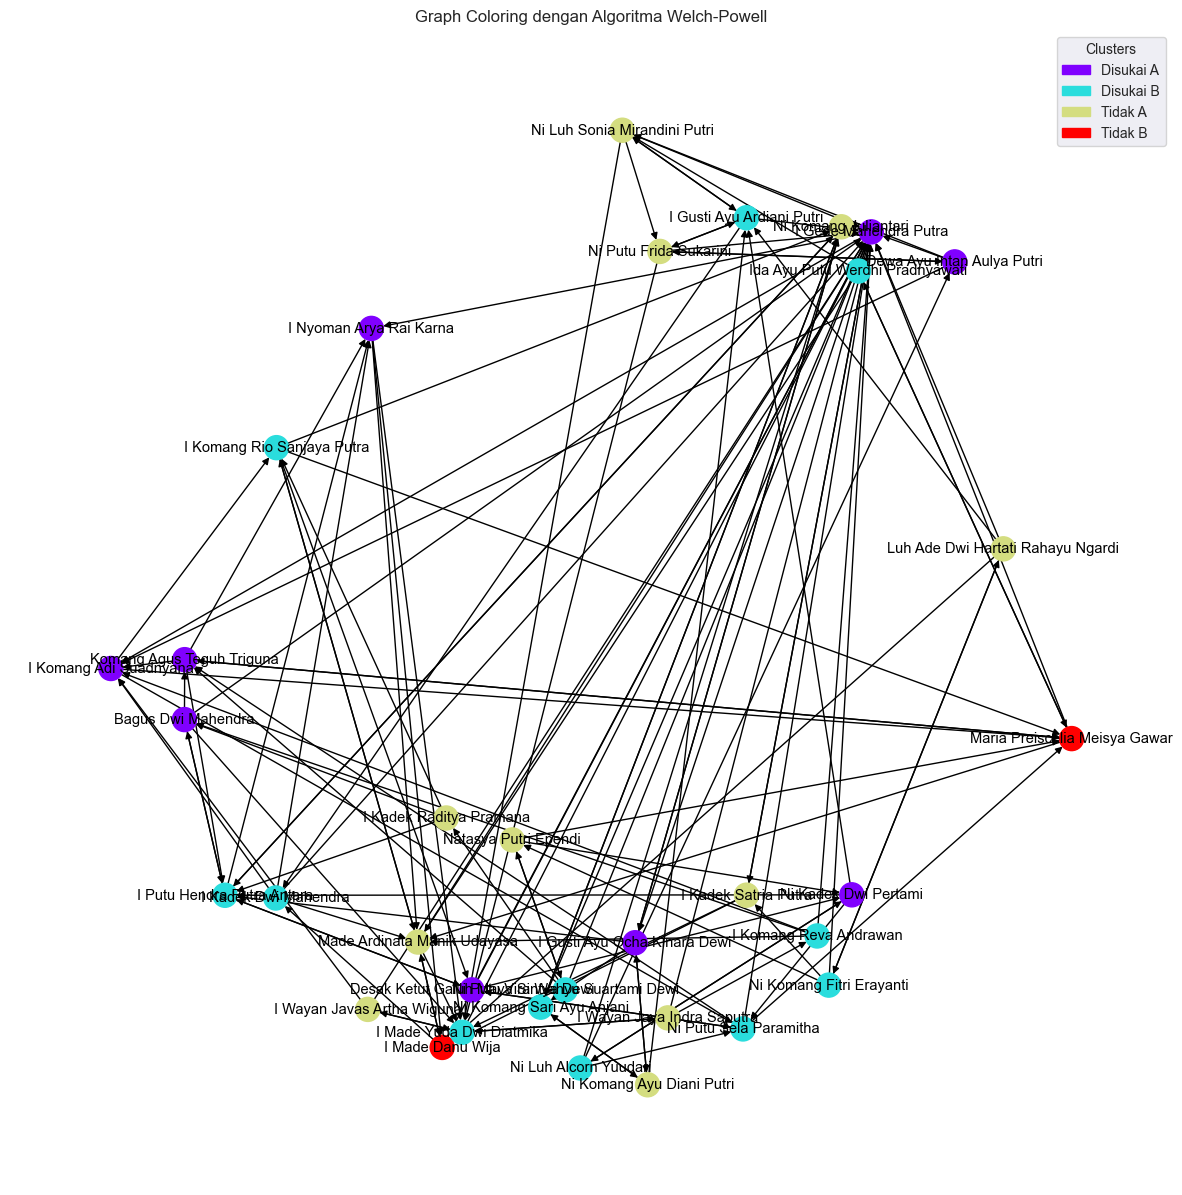

CPU times: user 6.04 s, sys: 306 ms, total: 6.35 s
Wall time: 6.6 s


'\nungu = 12\ntoska = 8\nalpukat = 12\nmerah = 2\n'

In [91]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


"""
ungu = 12
toska = 8
alpukat = 12
merah = 2
"""


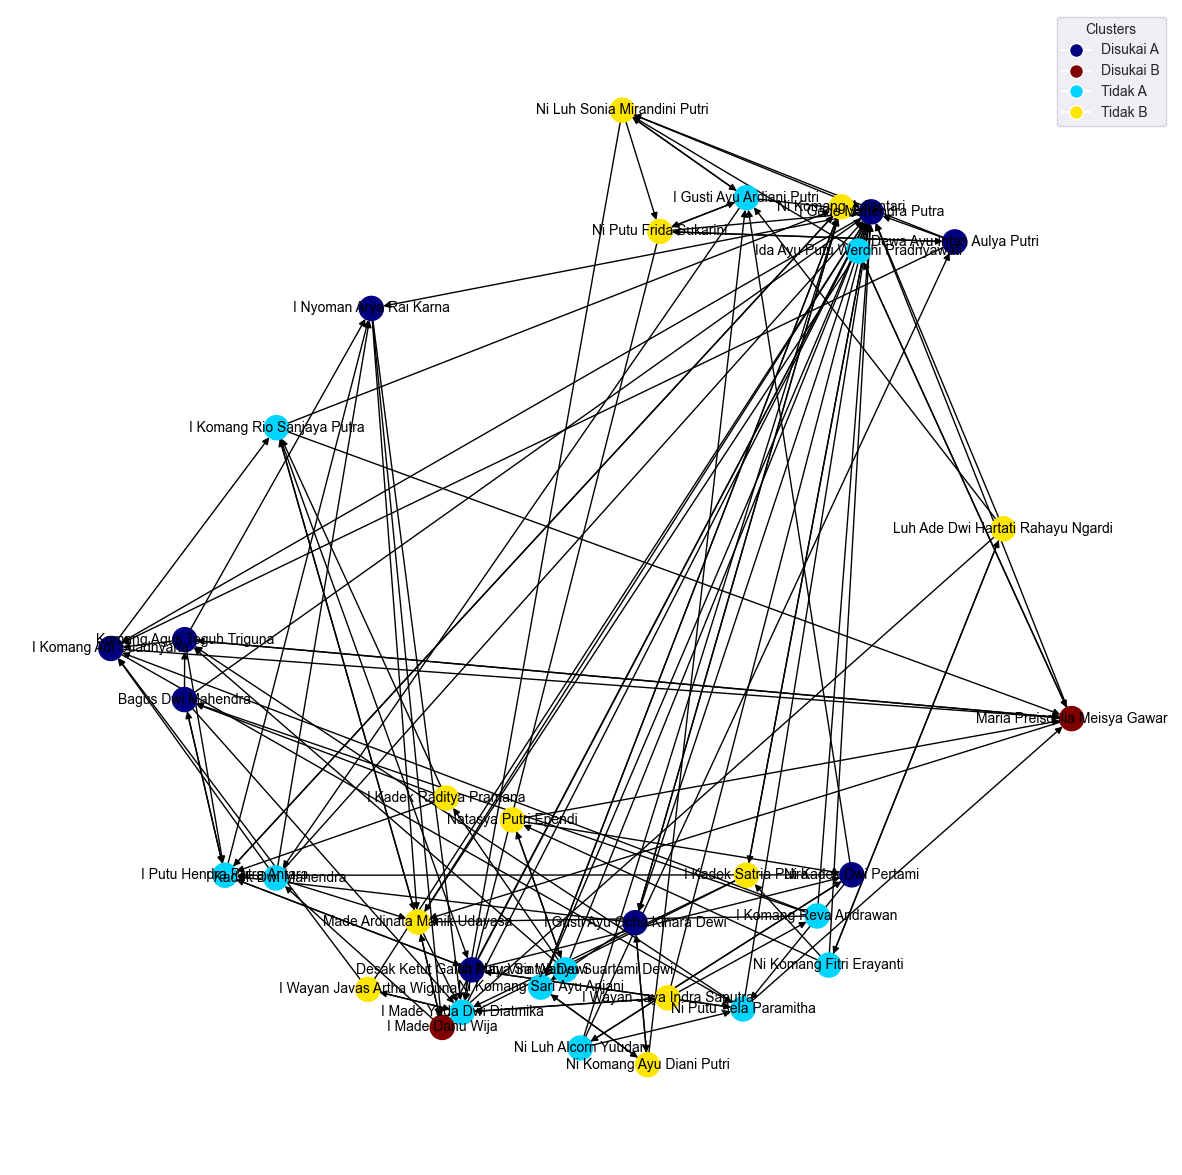

CPU times: user 6.14 s, sys: 388 ms, total: 6.53 s
Wall time: 7.4 s


In [92]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


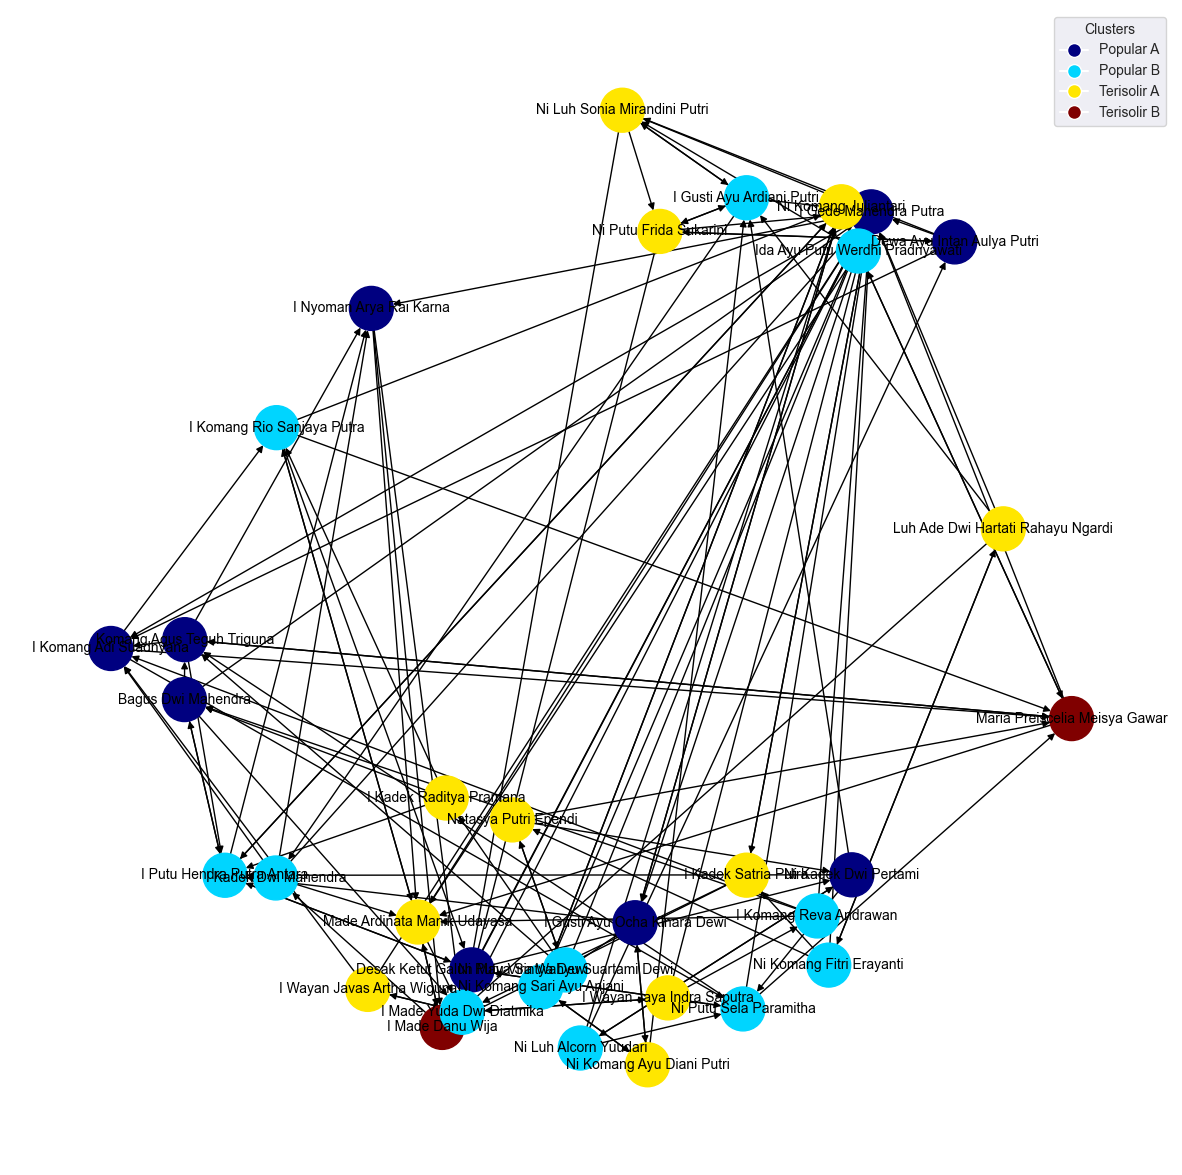

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


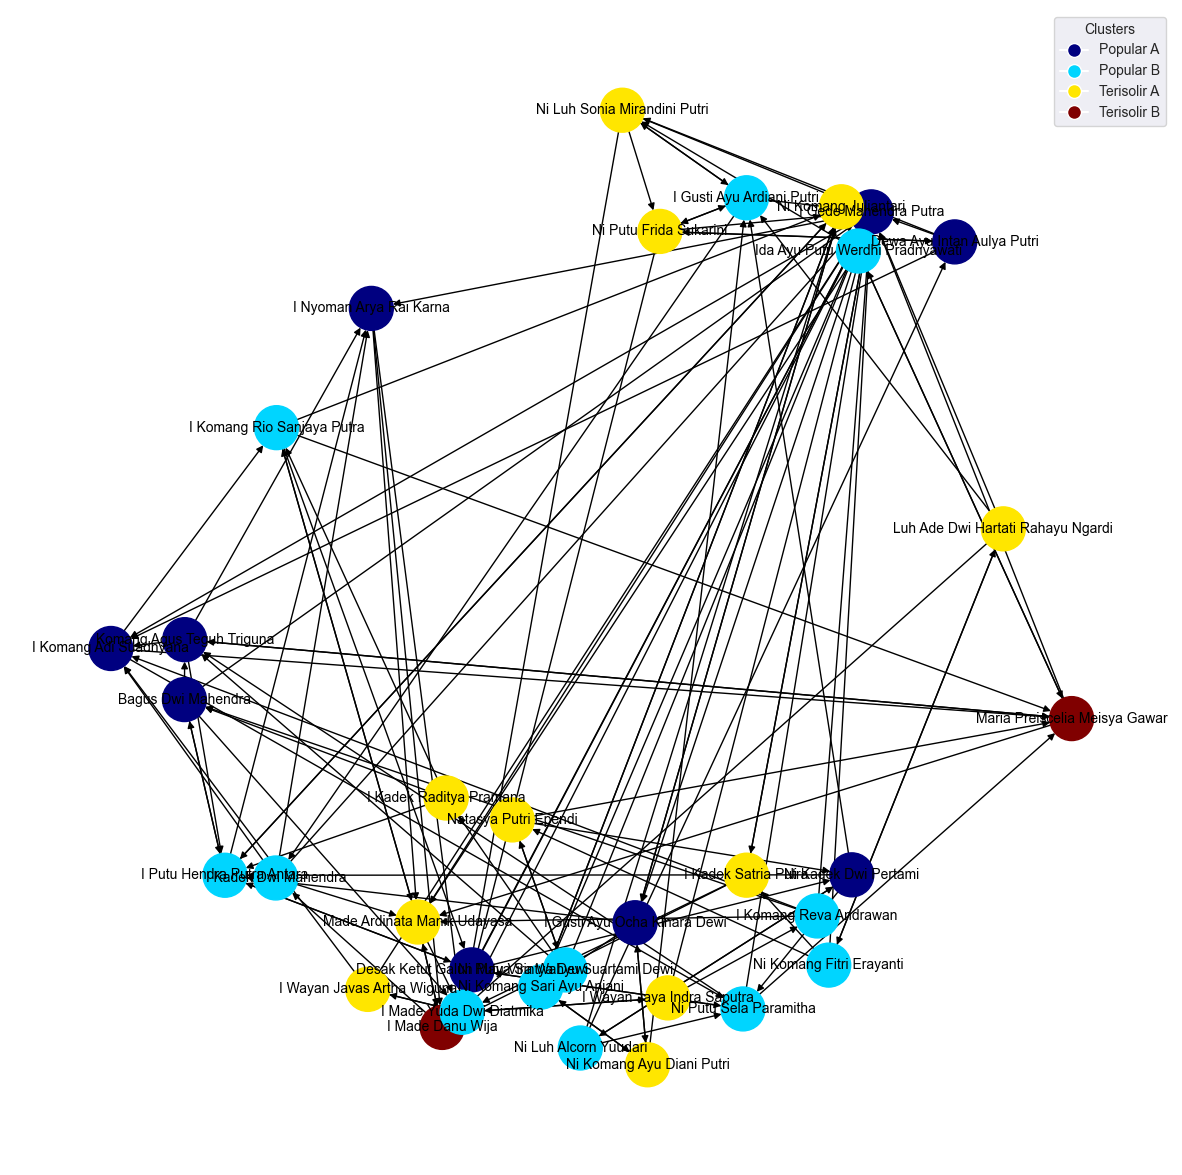

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


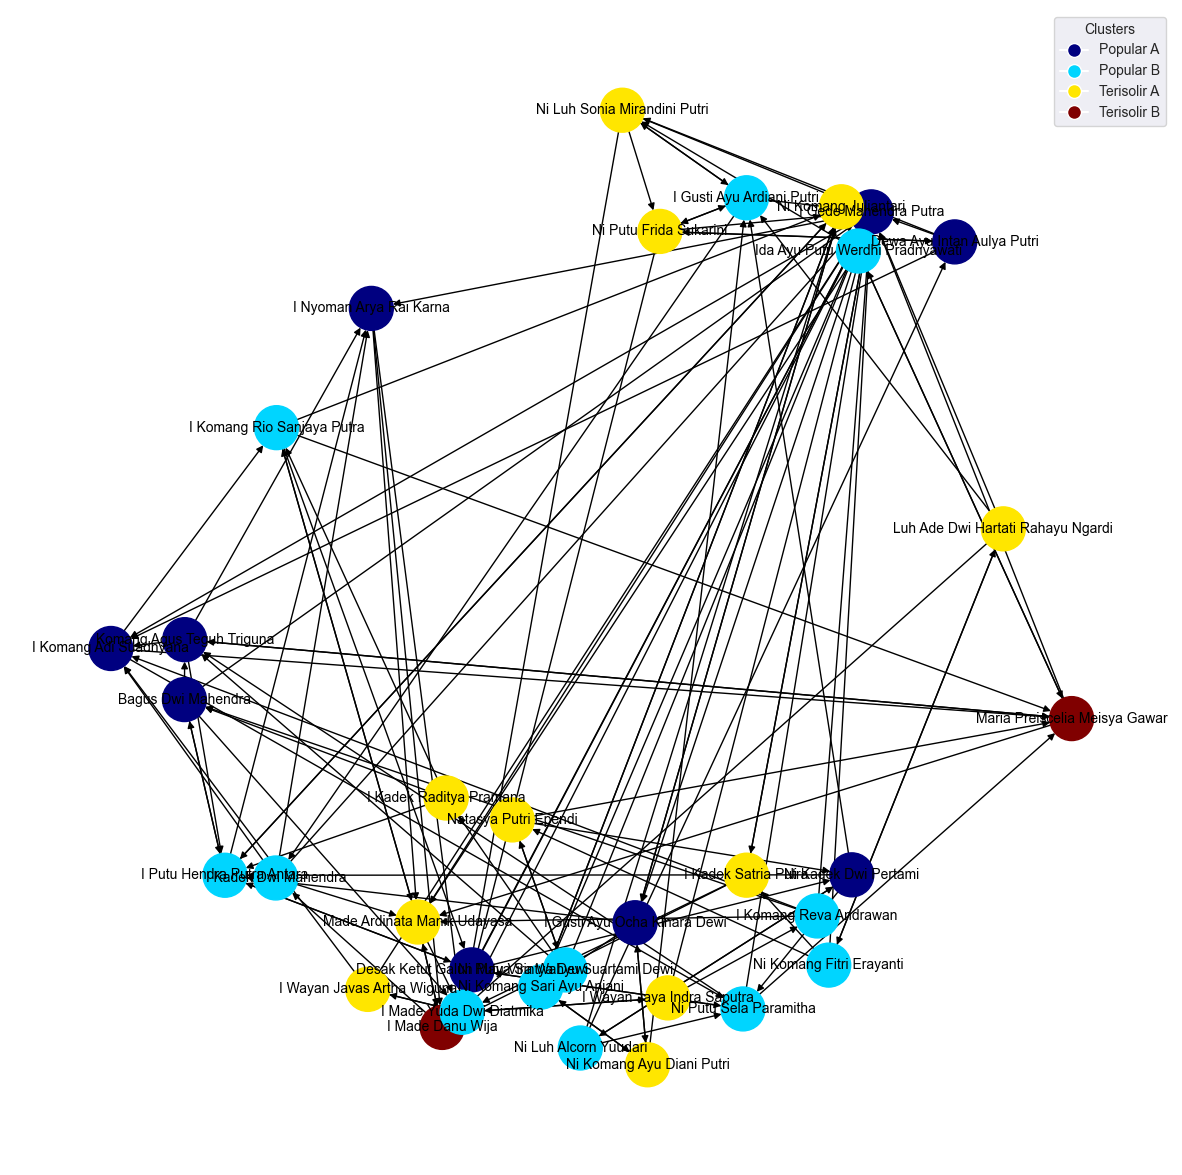

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


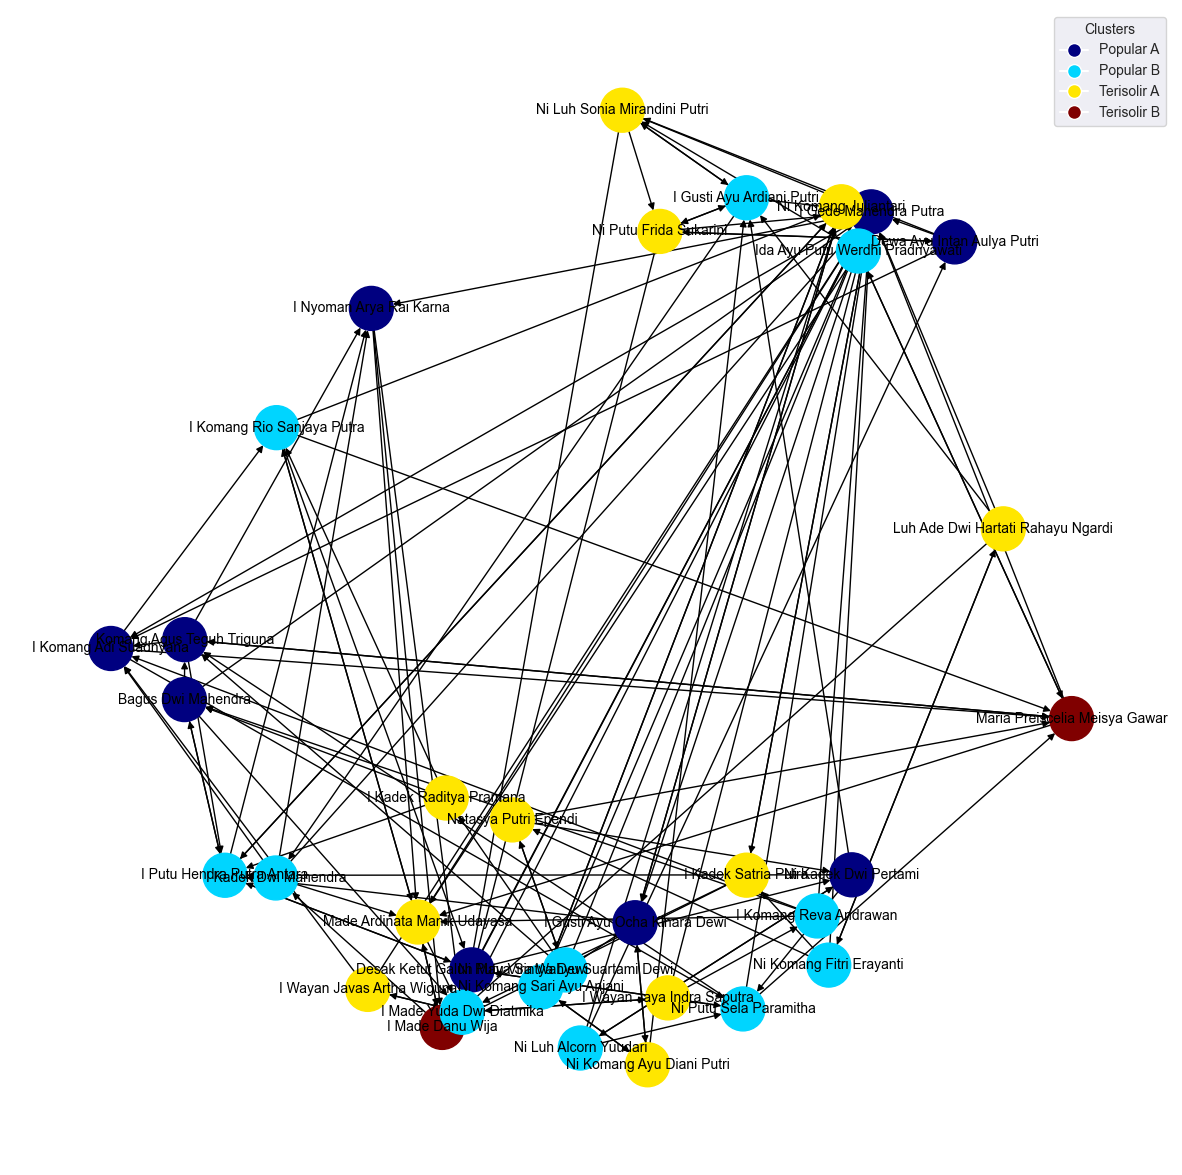

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


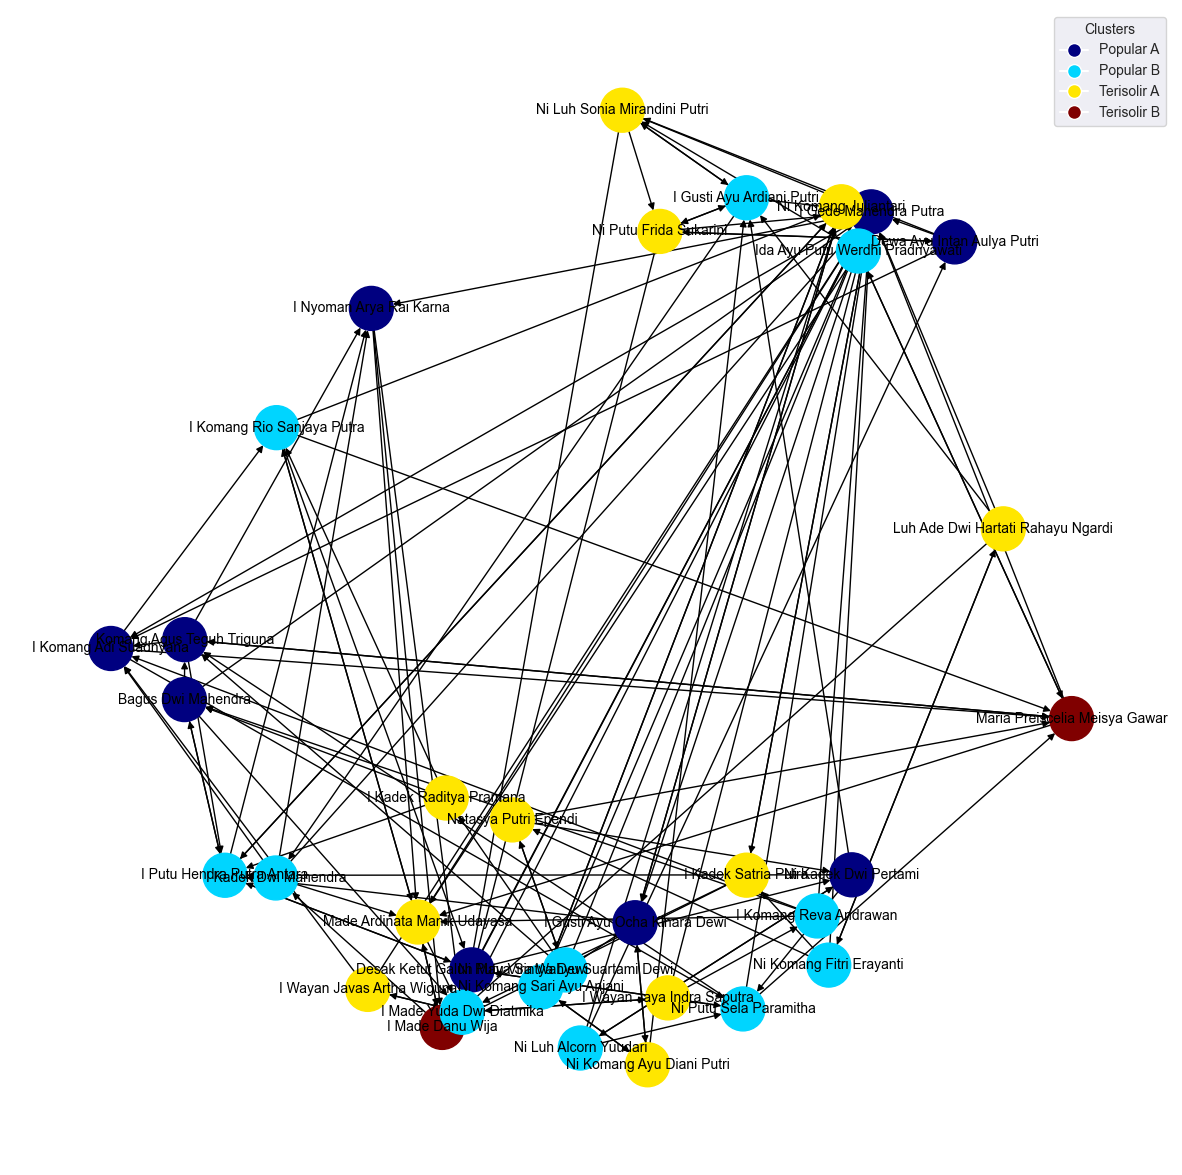

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


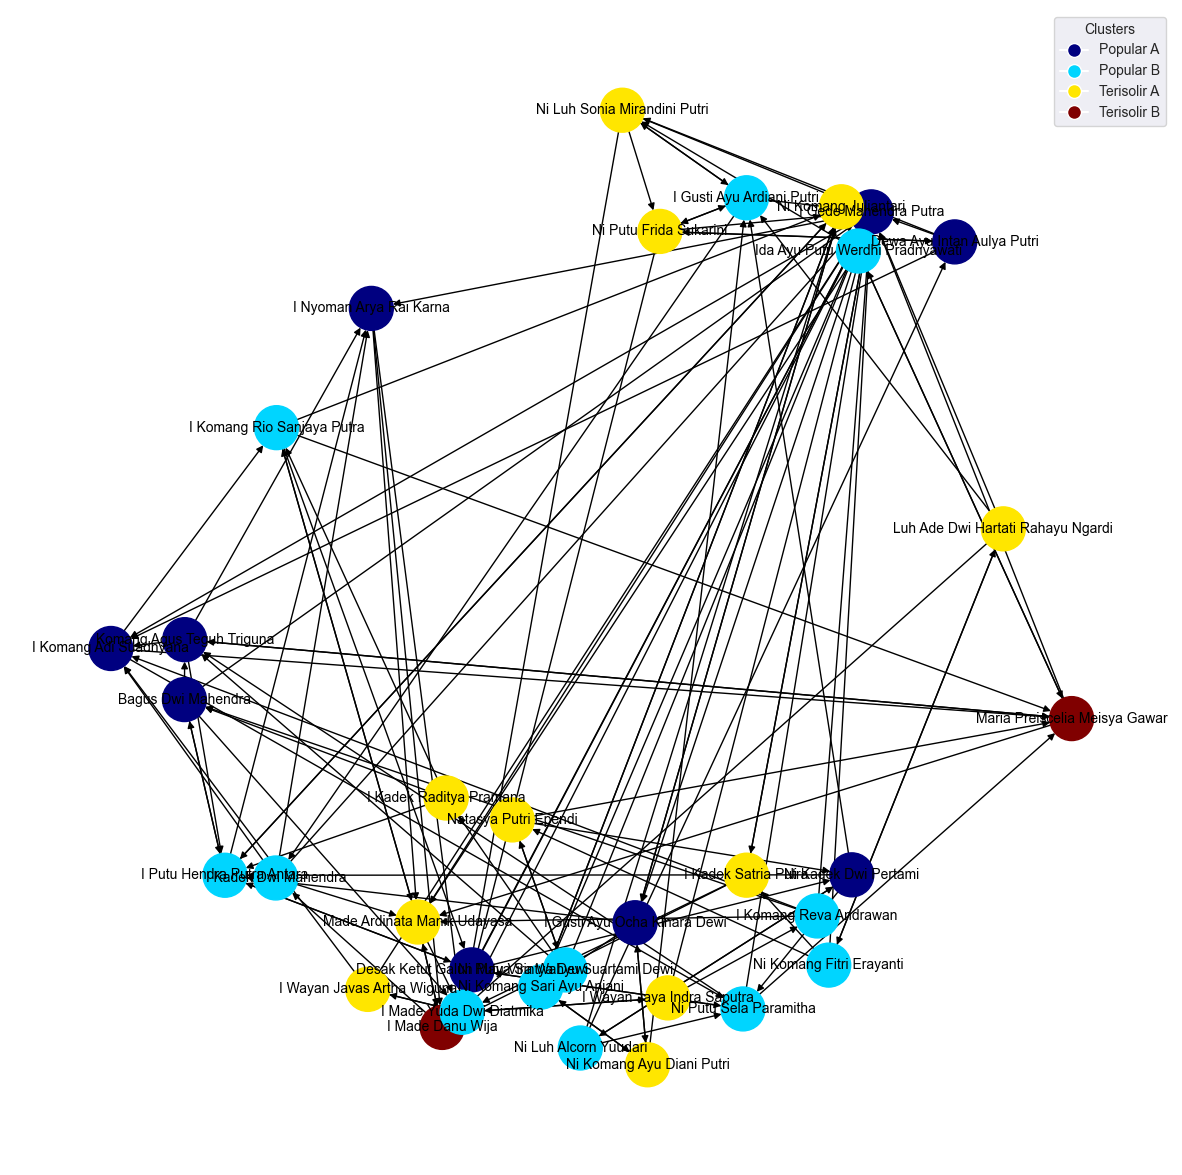

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


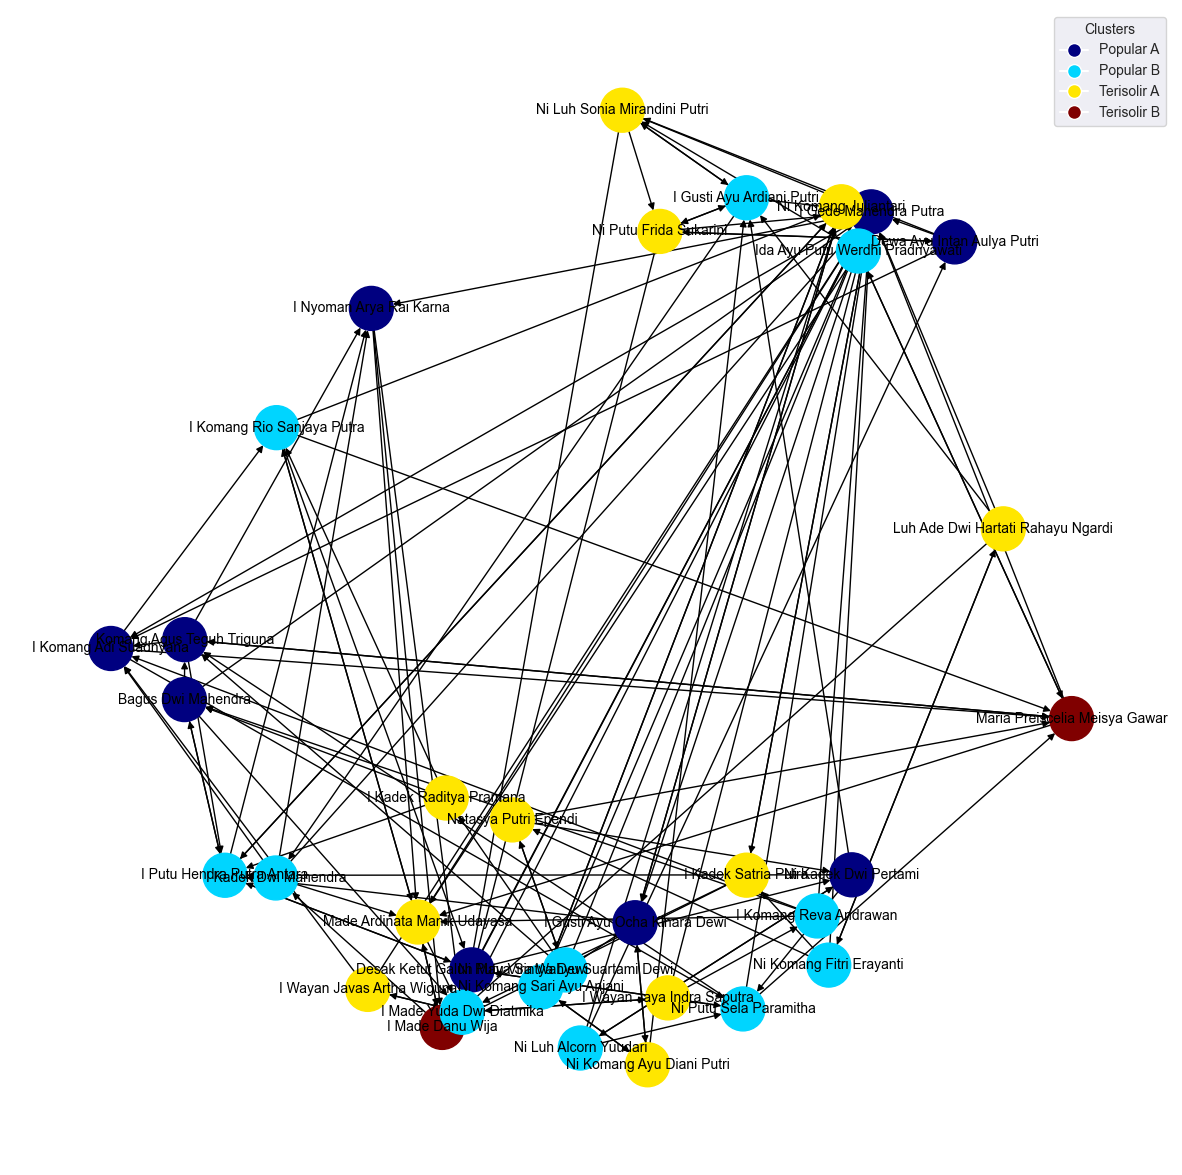

Nodes yang hilang: [0, 1, 2, 3, 5, 9, 14, 19, 24, 4, 6, 10, 11, 13, 15, 18, 26, 28, 29, 32, 33, 7, 8, 16, 17, 20, 21, 23, 25, 27, 30, 31, 12, 22]


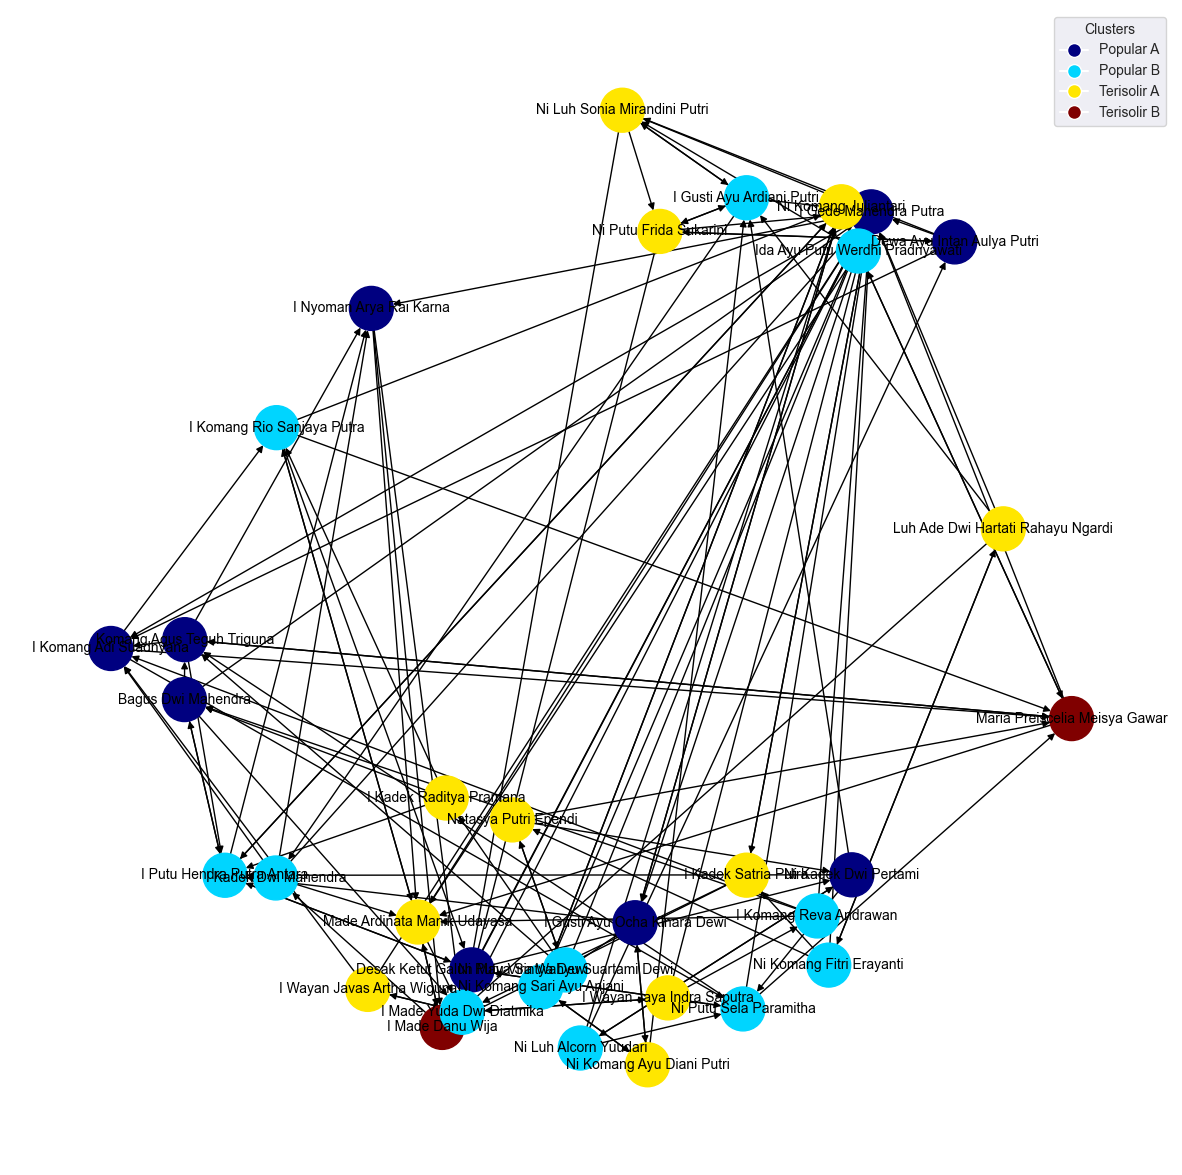

6.12 s ± 1.58 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%%timeit
bobot = {}
missing_nodes = []

# Code to initialize bobot for missing_nodes (assuming you have G defined somewhere)
for node in missing_nodes:
    bobot[node] = 0

for color_group in set(colors):
    nodes_in_group = [node for node, color in enumerate(colors) if color == color_group]
    for node in nodes_in_group:
        if node not in bobot:
            missing_nodes.append(node)
            bobot[node] = 0  # Initialize missing nodes in the bobot dictionary

print("Nodes yang hilang:", missing_nodes)

for node in G.nodes():
    bobot[node] = G.degree(node)

cluster_bobot_avg = {}

for color_group in set(colors):
    nodes_in_group = [node for node, color in enumerate(colors) if color == color_group]
    avg_bobot = np.mean([bobot[node] for node in nodes_in_group])  # Calculate the average degree for nodes in the group
    cluster_bobot_avg[color_group] = avg_bobot

sorted_clusters_by_bobot = sorted(cluster_bobot_avg.items(),
                                  key=lambda x: x[1],
                                  reverse=True)

custom_labels = {
    sorted_clusters_by_bobot[0][0]: "Popular A",
    sorted_clusters_by_bobot[1][0]: "Popular B",
    sorted_clusters_by_bobot[2][0]: "Terisolir A",
    sorted_clusters_by_bobot[3][0]: "Terisolir B"
}

# Example visualization code (you can customize this according to your data)
cmap = plt.cm.jet
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

nx.draw(G,
        pos,
        with_labels=True,
        node_color=mapped_colors,
        node_size=1000,
        font_size=10,
        ax=ax)

unique_color_groups = list(set(colors))
unique_colors_mapped = [cmap(norm(value)) for value in unique_color_groups]
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[group],
                      markersize=10,
                      markerfacecolor=color) for group, color in zip(unique_color_groups,
                                                                     unique_colors_mapped)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [94]:
file_path = "./sociometryclustering/Processed Data B.csv"
df = pd.read_csv(file_path)
df

Timestamp                    Email Address  \
0    5/3/2023 21:33:09    bagusdwimahendra383@gmail.com   
1    6/19/2023 9:53:14   nikomangsulastriasih@gmail.com   
2    5/3/2023 21:33:28            idewaayu306@gmail.com   
3    5/3/2023 20:21:09          igedebandem14@gmail.com   
4   6/19/2023 10:01:10   nikomangsulastriasih@gmail.com   
5    5/5/2023 14:53:49       ni4838@guru.smp.belajar.id   
6    6/19/2023 9:49:38   nikomangsulastriasih@gmail.com   
7    6/19/2023 9:56:10   nikomangsulastriasih@gmail.com   
8    5/3/2023 23:03:41           kadekradit02@gmail.com   
9    5/3/2023 19:17:20      ikadeksatriaputra@gmail.com   
10   5/4/2023 18:23:05          ikomangadi276@gmail.com   
11   5/4/2023 18:28:21          ikomangadi276@gmail.com   
12   5/4/2023 18:10:33              wanngela7@gmail.com   
13   5/4/2023 17:54:51           riokomang433@gmail.com   
14   5/4/2023 17:57:37           riokomang433@gmail.com   
15   5/4/2023 17:59:28             sayakelaz1@gmail.com   
16   6/19/2023 9:41:24   nikomangsulastriasih@gmail.com   
17   5/3/2023 19:07:40               aryaax1d@gmail.com   
18   5/3/2023 20:05:59               hp995911@gmail.com   
19   6/19/2023 9:58:32   nikomangsulastriasih@gmail.com   
20   5/4/2023 18:02:17     komanggatrawan2017@gmail.com   
21   5/3/2023 21:59:22           werdhiidaayu@gmail.com   
22   5/3/2023 21:36:52         teguhtriguna08@gmail.com   
23   5/4/2023 21:54:34         rahayungardi27@gmail.com   
24   5/3/2023 19:23:07         ardinatamanik4@gmail.com   
25   5/5/2023 22:50:38            yulitafanya@gmail.com   
26   5/4/2023 18:05:20   natasyaputri05062010@gmail.com   
27   5/5/2023 19:42:44          putunovariana@gmail.com   
28   5/4/2023 17:49:05        ayudianiputri11@gmail.com   
29   5/4/2023 17:48:48            erayanti983@gmail.com   
30   5/3/2023 19:17:57  nikomangjuliantari090@gmail.com   
31   5/4/2023 18:04:28              s16598206@gmail.com   
32   6/19/2023 9:46:04   nikomangsulastriasih@gmail.com   
33   5/3/2023 20:14:03         soniamirandini@gmail.com   
34   5/3/2023 20:48:20      putufridasukarini@gmail.com   
35   5/3/2023 21:58:29         selaparamitha5@gmail.com   
36   5/10/2023 8:49:24        vafamily.arya06@gmail.com   

                          NAMA LENGKAP  NO ABSEN KELAS  \
0                   Bagus Dwi Mahendra         1  VIIB   
1   Desak Ketut Galuh Maya Sintya Dewi         2  VIIB   
2           Dewa Ayu Intan Aulya Putri         3  VIIB   
3                I Gede Mahendra Putra         4  VIIB   
4                I Gede Mahendra Putra         5  VIIB   
5            I Gusti Ayu Ardiani Putri         6  VIIB   
6         I Gusti Ayu Ocha Kinara Dewi         7  VIIB   
7                 I Kadek Dwi Mahendra         8  VIIB   
8              I Kadek Raditya Pramana         9  VIIB   
9                 I Kadek Satria Putra        10  VIIB   
10              I Komang Adi Suadnyana        11  VIIB   
11              I Komang Adi Suadnyana        11  VIIB   
12              I Komang Reva Andrawan        12  VIIB   
13          I Komang Rio Sanjaya Putra        13  VIIB   
14          I Komang Rio Sanjaya Putra        13  VIIB   
15                    I Made Danu Wija        14  VIIB   
16            I Made Yuda Dwi Diatmika        15  VIIB   
17             I Nyoman Arya Rai Karna        16  VIIB   
18          I Putu Hendra Putra Antara        17  VIIB   
19          I Wayan Javas Artha Wiguna        18  VIIB   
20          I Wayan Jaya Indra Saputra        19  VIIB   
21     Ida Ayu Putu Werdhi Pradnyawati        20  VIIB   
22           Komang Agus Teguh Triguna        21  VIIB   
23   Luh Ade Dwi Hartati Rahayu Ngardi        22  VIIB   
24         Made Ardinata Manik Udayasa        23  VIIB   
25       Maria Preiscelia Meisya Gawar        24  VIIB   
26                Natasya Putri Ependi        25  VIIB   
27                Ni Kadek Dwi Pertami        26  VIIB   
28           Ni Komang Ayu Diani Putri        27  VIIB   
29            Ni Komang Fitri 

In [95]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

Nama siswa/i yang disukai  Frekuensi disukai  \
0          Made Ardinata Manik Udayasa                7.0   
1              I Nyoman Arya Rai Karna                6.0   
2           I Putu Hendra Putra Antara                4.0   
3           I Komang Rio Sanjaya Putra                4.0   
4            I Gusti Ayu Ardiani Putri                3.0   
5               Ni Putu Sela Paramitha                3.0   
6          I Gede Bandem Satria Wijaya                3.0   
7        Maria Preiscelia Meisya Gawar                3.0   
8                     I Made Danu Wija                3.0   
9               Ni Putu Frida Sukarini                3.0   
10        Ni Luh Sonia Mirandini Putri                3.0   
11           Ni Komang Sari Ayu Anjani                3.0   
12                  Bagus Dwi Mahendra                3.0   
13            I Made Yuda Dwi Diatmika                2.0   
14        I Gusti Ayu Ocha Kinara Dewi                2.0   
15           Ni Komang Ayu Diani Putri                2.0   
16                Natasya Putri Ependi                2.0   
17           Komang Agus Teguh Triguna                2.0   
18                Ni Kadek Dwi Pertami                2.0   
19                Ni Komang Juliantari                2.0   
20               I Gede Mahendra Putra                1.0   
21     Ida Ayu Putu Werdhi Pradnyawati                1.0   
22              I Komang Reva Andrawan                1.0   
23    Ni Putu Vira Wahyu Suartami Dewi                1.0   
24                I Kadek Dwi Mahendra                1.0   
25   Luh Ade Dwi Hartati Rahayu Ngardi                1.0   
26                I Kadek Satria Putra                1.0   
27  Desak Ketut Galuh Maya Sintya Dewi                1.0   
28               Ni Luh Alcorn Yuudari                1.0   
29            Ni Komang Fitri Erayanti                1.0   
30          I Wayan Javas Artha Wiguna                1.0   
31          Dewa Ayu Intan Aulya Putri                1.0   

       Nama siswa/i yang tidak disukai  Frekuensi tidak disukai  
0                I Gede Mahendra Putra                     23.0  
1             I Made Yuda Dwi Diatmika                      7.0  
2               I Komang Adi Suadnyana                      7.0  
3        Maria Preiscelia Meisya Gawar                      5.0  
4                 Ni Komang Juliantari                      4.0  
5           I Putu Hendra Putra Antara                      4.0  
6                     I Made Danu Wija                      3.0  
7            I Gusti Ayu Ardiani Putri                      3.0  
8   Desak Ketut Galuh Maya Sintya Dewi                      3.0  
9               Ni Putu Sela Paramitha                      2.0  
10          I Komang Rio Sanjaya Putra                      2.0  
11           Komang Agus Teguh Triguna                      2.0  
12                Ni Kadek Dwi Pertami                      1.0  
13                I Kadek Satria Putra                      1.0  
14           Ni Komang Sari Ayu Anjani                      1.0  
15          Dewa Ayu Intan Aulya Putri                      1.0  
16        I Gusti Ayu Ocha Kinara Dewi                      1.0  
17                I Kadek Dwi Mahendra                      1.0  
18          I Wayan Jaya Indra Saputra                      1.0  
19         Made Ardinata Manik Udayasa                      1.0  
20             I Kadek Raditya Pramana                      1.0  
21                                 NaN                      NaN  
22                                 NaN                      NaN  
23                                 NaN                      NaN  
24                                 NaN                      NaN  
25                                 NaN                      NaN  
26                                 NaN                      NaN  
27                                 NaN                      NaN  
28                                 NaN                      NaN  
29                 